alfie pymongo use

In [1]:
import os
from dotenv import load_dotenv
from pathlib import Path
from pymongo import MongoClient




In [2]:
#jonathan's stuff
import matplotlib.pyplot as plt
import pandas as pd
import ast
import datetime
import seaborn as sns
import json
import numpy as np

import matplotlib as mpl

from datetime import datetime
from dateutil.parser import parse

In [3]:
from pandas.io.json import json_normalize

In [4]:
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
%matplotlib inline

In [5]:
from astropy.stats import RipleysKEstimator

In [6]:
# load .env variable
base_dir = 'C:/Users/Alfie/Documents/MSc Smart Cities/Term 2/Spatial Data Capture Storage and Analysis/Coursework/Analysis Test/'
dotenv_file = os.path.join(base_dir, '.env')

In [7]:
if os.path.isfile(dotenv_file):
    load_dotenv(dotenv_file, verbose=True)

In [8]:
db_uri = os.getenv('DB_URI')

In [9]:
db_client = MongoClient(str(db_uri))

C:\Users\Alfie\Anaconda3\lib\site-packages\pymongo\common.py:555: UserWarning: Unknown option retryWrites
  warnings.warn(str(exc))


In [10]:
# choose a database to connect to (.london)
db_london = db_client.london
status = db_client.london.command('serverStatus')

In [11]:
db_london_events = db_london['events']
db_london_artist = db_london['artists']

In [12]:
allLondonEvents = db_london_events.find()

In [13]:
allLondonEvents

In [14]:
londonEventsdf = pd.DataFrame(list(allLondonEvents))

In [15]:
londonEventsdf

,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,location,name,popularity,spotify,time,type,url,venue
0,5af9c6dc0cc9ab0004e227d1,[{'mbid': ['aca5718f-4f49-4439-b8f6-209db3f117...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '4ac518e9f964a520daab20e3', 'name': 'Ro...",31245569,"{'listeners': [412072, 57, 192843], 'listeners...","{'lng': -0.1491962, 'lat': 51.5429551}",Frank Turner with Seán McGowan and Get Cape. W...,0.0503,"{'genres': [], 'popularity': [64, 25, 32], 'po...",19:00:00,Concert,http://www.songkick.com/concerts/31245569-fran...,"{'id': 17874, 'name': 'Roundhouse', 'location'..."
1,5af9c6de0cc9ab0004e227d3,"[{'mbid': [], 'id': 8437833, 'name': 'Andy May...",2018-05-14,NaT,None,"{'id': '4ac518c5f964a520afa420e3', 'name': 'Th...",31640764,"{'listeners': [18], 'listeners_sum': 18, 'play...","{'lng': -0.1011681, 'lat': 51.5233496}","Andy May Trio at The Slaughtered Lamb (May 14,...",0.0000,"{'genres': [], 'popularity': [3], 'popularity_...",None,Concert,http://www.songkick.com/concerts/31640764-andy...,"{'id': 6950, 'name': 'The Slaughtered Lamb', '..."
2,5af9c6e30cc9ab0004e227d6,[{'mbid': ['6655955b-1c1e-4bcb-84e4-81bcd9efab...,2018-05-14,2018-05-14 17:45:00,2018-05-14T18:45:00+0100,"{'id': '4ac518e8f964a52075ab20e3', 'name': 'Ro...",31785344,"{'listeners': [721424, 19477], 'listeners_sum'...","{'lng': -0.1781517, 'lat': 51.500786}",Ólafur Arnalds with Manu Delago at Royal Alber...,0.0329,"{'genres': ['bow pop', 'chamber pop', 'composi...",18:45:00,Concert,http://www.songkick.com/concerts/31785344-olaf...,"{'id': 17538, 'name': 'Royal Albert Hall', 'lo..."
3,5af9c6e50cc9ab0004e227d8,[{'mbid': ['d100e4ac-31f1-4af1-b0e1-f07c545abb...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '53713174498e54bcdede7275', 'name': 'Up...",32044684,"{'listeners': [313], 'listeners_sum': 313, 'pl...","{'lng': -0.1038429, 'lat': 51.5466983}",Elephant Sessions at Thousand Island (formerly...,0.0001,"{'genres': ['scottish folk'], 'popularity': [3...",19:00:00,Concert,http://www.songkick.com/concerts/32044684-elep...,"{'id': 434301, 'name': 'Thousand Island (forme..."
4,5af9c6eb0cc9ab0004e227db,[{'mbid': ['366323f3-0409-4a30-a3e9-ce1e25d277...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",32192284,"{'listeners': [7057, 3625], 'listeners_sum': 1...","{'lng': -0.2314873, 'lat': 51.5062847}","Gary Lucas and Ed Laurie at Bush Hall (May 14,...",0.0004,"{'genres': [], 'popularity': [25, 1], 'popular...",19:30:00,Concert,http://www.songkick.com/concerts/32192284-gary...,"{'id': 17541, 'name': 'Bush Hall', 'location':..."
5,5af9c6ed0cc9ab0004e227dd,[{'mbid': ['a1ef6bc8-2644-4b6d-aa21-27b630acf7...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,{},32454499,"{'listeners': [113695], 'listeners_sum': 11369...","{'lng': -0.5541293, 'lat': 51.2486437}","Nils Lofgren at G Live (May 14, 2018)",0.0052,"{'genres': ['pub rock', 'roots rock'], 'popula...",19:30:00,Concert,http://www.songkick.com/concerts/32454499-nils...,"{'id': 1262471, 'name': 'G Live', 'location': ..."
6,5af9c6ef0cc9ab0004e227df,[{'mbid': ['c1982570-8efb-4cf7-bb5b-c9c026c0e8...,2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '59bbad4dfebf314eba5d9fbb', 'name': 'Br...",32492684,"{'listeners': [120157], 'listeners_sum': 12015...","{'lng': -0.0774607, 'lat': 51.5033289}",Ladysmith Black Mambazo at Bridge Theatre (May...,0.0115,"{'genres': ['afropop', 'world'], 'popularity':...",19:00:00,Concert,http://www.songkick.com/concerts/32492684-lady...,"{'id': 3565864, 'name': 'Bridge Theatre', 'loc..."
7,5af9c6f00cc9ab0004e227e1,"[{'mbid': [], 'id': 6651674, 'name': 'Gemma Kh...",2018-05-14,2018-05-14 18:00:00,2018-05-14T19:00:00+0100,"{'id': '53aa2db3498e191dfd67bd05', 'name': 'Fo...",32649974,"{'listeners': [32], 'listeners_sum': 32, 'play...","{'lng': -0.1355174, 'lat': 51.5403054}",Gemma Khawaja at Folk in the Cellar: The Const...,0.0000,NaN,19:00:00,Concert,http:

In [16]:
londonEventsdf['spotify'][50]['genres']

['aussietronica', 'deep australian indie', 'indie r&b', 'vapor soul']

In [24]:
#now to do all the processing that jonathan sorted out

# Put this in the date format
londonEventsdf['date'] = [(datetime.strptime(londonEventsdf['date'][x], '%Y-%m-%d')) for x in range(len(londonEventsdf['date']))]

# Convert the dates into day name
londonEventsdf['date_name'] = [(londonEventsdf['date'][x].strftime("%A")) for x in range(len(londonEventsdf['date']))]

# Lat & Long
londonEventsdf['lat'] = [(londonEventsdf['location'][x]['lat']) for x in range(len(londonEventsdf['location']))]
londonEventsdf['lng'] = [(londonEventsdf['location'][x]['lng']) for x in range(len(londonEventsdf['location']))]

In [25]:
#now to try out the clustering with this new data set
#now import DBSCAN clustering package
from sklearn.cluster import DBSCAN

In [26]:
#select only reggae gigs
londonEventsdf.columns

Index(['_id', 'artists', 'date', 'datetime', 'datetime_source', 'foursquare',
       'id', 'lastfm', 'location', 'name', 'popularity', 'spotify', 'time',
       'type', 'url', 'venue', 'date_name', 'lat', 'lng'],
      dtype='object')

In [27]:
#reggae from spotify
reggaeEventsdf = londonEventsdf[londonEventsdf['spotify'].astype(str).str.contains('reggae', case=False)]

In [28]:
#reggae from lastfm
reggaeEventsdf2 = londonEventsdf[londonEventsdf['lastfm'].astype(str).str.contains('reggae', case=False)]

In [29]:
allReggaeEvents = pd.concat([reggaeEventsdf,reggaeEventsdf2])

In [30]:
allReggaeEvents

,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,location,name,popularity,spotify,time,type,url,venue,date_name,lat,lng
472,5afabe06dcab560004a0b2d5,[{'mbid': ['d121b55b-bb5d-4e9c-89d3-3045d75c73...,2018-05-20,2018-05-20 13:00:00,2018-05-20T14:00:00+0100,"{'id': '4ac518c6f964a52019a520e3', 'name': 'Ja...",33546774,"{'listeners': [4939, 7819, 73845], 'listeners_...","{'lng': -0.1119528, 'lat': 51.47095}",Jacky Murda with Solo Banton and Macka B at Br...,0.0029,"{'genres': ['jungle', 'ragga jungle', 'uk dub'...",14:00:00,Concert,http://www.songkick.com/concerts/33546774-jack...,"{'id': 3372, 'name': 'Brixton Jamm', 'location...",Sunday,51.4710,-0.1120
721,5afaee14f4259d0004b0e5bf,[{'mbid': ['ea3b97e8-8a76-4ea7-8e6f-3ebf40acae...,2018-04-14,2018-04-14 18:00:00,2018-04-14T19:00:00+0100,NaN,33016154,"{'listeners': [114363], 'listeners_sum': 11436...","{'lng': -0.0758036, 'lat': 51.536671}","Mad Professor at Archspace (April 14, 2018)",0.0039,"{'genres': ['dub', 'nu-cumbia', 'reggae', 'roo...",19:00:00,Concert,http://www.songkick.com/concerts/33016154-mad-...,"{'id': 3337834, 'name': 'Archspace', 'location...",Saturday,51.5367,-0.0758
1082,5afaf23cf4259d0004b0e956,[{'mbid': ['b7d92248-97e3-4450-8057-6fe06738f7...,2018-04-21,NaT,None,NaN,33330699,"{'listeners': [483591, 1747583, 1889998, 94300...","{'lng': -0.1781517, 'lat': 51.500786}",The Queen's Birthday Party 2018,0.1899,"{'genres': ['canadian pop', 'pop', 'post-teen ...",None,Festival,http://www.songkick.com/festivals/2299814-quee...,"{'id': 17538, 'name': 'Royal Albert Hall', 'lo...",Saturday,51.5008,-0.1782
1290,5afaf4d5f4259d0004b0eb64,[{'mbid': ['b72cdb8b-81dd-444a-ab9a-b3487d001e...,2018-05-08,2018-05-08 18:00:00,2018-05-08T19:00:00+0100,NaN,33523264,"{'listeners': [7123, 52], 'listeners_sum': 717...","{'lng': -0.1417646, 'lat': 51.5387999}",Las Manos De Filippi and BROCKER at Our Black ...,0.0001,"{'genres': ['argentine reggae', 'argentine roc...",19:00:00,Concert,http://www.songkick.com/concerts/33523264-las-...,"{'id': 2845858, 'name': 'Our Black Heart', 'lo...",Tuesday,51.5388,-0.1418
1493,5afcd54a4054df00043ae55a,[{'mbid': ['35e53195-f6e1-40bc-a3ae-62b1900ee1...,2018-05-24,2018-05-24 18:00:00,2018-05-24T19:00:00+0100,"{'id': '4ac518e8f964a520b3ab20e3', 'name': 'O2...",32793699,"{'listeners': [78988], 'listeners_sum': 78988,...","{'lng': -0.2238407, 'lat': 51.503507}",Gente de Zona at O2 Shepherd's Bush Empire (Ma...,0.0315,"{'genres': ['latin', 'latin hip hop', 'latin p...",19:00:00,Concert,http://www.songkick.com/concerts/32793699-gent...,"{'id': 38320, 'name': 'O2 Shepherd's Bush Empi...",Thursday,51.5035,-0.2238
1574,5aff77ee84d273000431fe19,[{'mbid': ['d7492185-0238-46b9-b5e9-3173920445...,2018-05-25,2018-05-25 11:00:00,2018-05-25T12:00:00+0100,"{'id': '5002e054e4b042c51cf1c8bb', 'name': 'Vi...",31697529,"{'listeners': [1895, 1159204, 2860129, 1980084...","{'lng': -0.0425357, 'lat': 51.5352741}",All Points East 2018,0.4133,"{'genres': ['downtempo', 'dream pop', 'indietr...",12:00:00,Festival,http://www.songkick.com/festivals/2072544-all-...,"{'id': 3745, 'name': 'Victoria Park', 'locatio...",Friday,51.5353,-0.0425
14,5af9c7040cc9ab0004e227f2,[{'mbid': ['e3c24e1c-1e43-403b-8407-90c8c41070...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b75c0dcf964a52020222ee3', 'name': 'Th...",33042619,"{'listeners': [162766, 9376, 15377], 'listener...","{'lng': -0.1387684, 'lat': 51.5575896}","Now, Now with So Below and JOAN at The Dome, T...",0.0089,"{'genres': ['canadian hip hop', 'pop', 'rap', ...",19:30:00,Concert,http://www.songkick.com/concerts/33042619-now-...,"{'id': 29349, 'name': 'The Dome, Tufnell Park'...",Monday,51.5576,-0.1388
82,5af9c7ca0cc9ab0004e22896,[{'mbid': ['51f447ee-e5ba-4cc1-b27c-42ea5a6103...,2018-05-15,2018-05-15 18:30:00,2018-05-15T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",33450909,"{'listeners': [39247, 36646], 'listeners_sum':...","{'lng': -0.2314873, 'lat': 51.5062847}","Jack and Jack with Loo

In [31]:
#get rid of duplicates

allReggaeEvents = allReggaeEvents.drop_duplicates(subset='_id', keep='last')

In [32]:
allReggaeEvents

,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,location,name,popularity,spotify,time,type,url,venue,date_name,lat,lng
14,5af9c7040cc9ab0004e227f2,[{'mbid': ['e3c24e1c-1e43-403b-8407-90c8c41070...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b75c0dcf964a52020222ee3', 'name': 'Th...",33042619,"{'listeners': [162766, 9376, 15377], 'listener...","{'lng': -0.1387684, 'lat': 51.5575896}","Now, Now with So Below and JOAN at The Dome, T...",0.0089,"{'genres': ['canadian hip hop', 'pop', 'rap', ...",19:30:00,Concert,http://www.songkick.com/concerts/33042619-now-...,"{'id': 29349, 'name': 'The Dome, Tufnell Park'...",Monday,51.5576,-0.1388
82,5af9c7ca0cc9ab0004e22896,[{'mbid': ['51f447ee-e5ba-4cc1-b27c-42ea5a6103...,2018-05-15,2018-05-15 18:30:00,2018-05-15T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",33450909,"{'listeners': [39247, 36646], 'listeners_sum':...","{'lng': -0.2314873, 'lat': 51.5062847}","Jack and Jack with Loote at Bush Hall (May 15,...",0.0279,"{'genres': ['pop', 'post-teen pop', 'teen pop'...",19:30:00,Concert,http://www.songkick.com/concerts/33450909-jack...,"{'id': 17541, 'name': 'Bush Hall', 'location':...",Tuesday,51.5063,-0.2315
270,5afabb18dcab560004a0b08f,[{'mbid': ['83bde443-318c-4d4e-8f31-1ca159df14...,2018-05-18,2018-05-18 17:30:00,2018-05-18T18:30:00+0100,"{'id': '53713174498e54bcdede7275', 'name': 'Up...",32751419,"{'listeners': [3113], 'listeners_sum': 3113, '...","{'lng': -0.1038429, 'lat': 51.5466983}",The Undercover Hippy at Thousand Island (forme...,0.0007,"{'genres': [], 'popularity': [37], 'popularity...",18:30:00,Concert,http://www.songkick.com/concerts/32751419-unde...,"{'id': 434301, 'name': 'Thousand Island (forme...",Friday,51.5467,-0.1038
428,5afabd8ddcab560004a0b271,"[{'mbid': [], 'id': 20602, 'name': 'Fabio And ...",2018-05-19,2018-05-19 01:30:00,2018-05-19T02:30:00+0100,"{'id': '4c308a57ed37a5935bfb6803', 'name': 'Da...",33760344,"{'listeners': [3021, 23922, 46, 13227, 387, 10...","{'lng': -0.0747739, 'lat': 51.5469092}","Fabio And Grooverider, Ed Solo, MC GQ, The Rag...",0.0035,"{'genres': ['breakbeat', 'drum and bass', 'jun...",02:30:00,Concert,http://www.songkick.com/concerts/33760344-fabi...,"{'id': 1322316, 'name': 'Dalston Roof Park', '...",Saturday,51.5469,-0.0748
456,5afabddbdcab560004a0b2b0,[{'mbid': ['a8b0dac5-9f4b-4b28-99fc-7e04980cc7...,2018-05-20,2018-05-20 18:00:00,2018-05-20T19:00:00+0100,"{'id': '4ac518c7f964a52072a520e3', 'name': 'Ja...",32754269,"{'listeners': [4234], 'listeners_sum': 4234, '...","{'lng': -0.1430815, 'lat': 51.5387092}","Ezhel at The Jazz Cafe (May 20, 2018)",0.0009,"{'genres': ['deep turkish rock', 'turkish hip ...",19:00:00,Concert,http://www.songkick.com/concerts/32754269-ezhe...,"{'id': 7404, 'name': 'The Jazz Cafe', 'locatio...",Sunday,51.5387,-0.1431
472,5afabe06dcab560004a0b2d5,[{'mbid': ['d121b55b-bb5d-4e9c-89d3-3045d75c73...,2018-05-20,2018-05-20 13:00:00,2018-05-20T14:00:00+0100,"{'id': '4ac518c6f964a52019a520e3', 'name': 'Ja...",33546774,"{'listeners': [4939, 7819, 73845], 'listeners_...","{'lng': -0.1119528, 'lat': 51.47095}",Jacky Murda with Solo Banton and Macka B at Br...,0.0029,"{'genres': ['jungle', 'ragga jungle', 'uk dub'...",14:00:00,Concert,http://www.songkick.com/concerts/33546774-jack...,"{'id': 3372, 'name': 'Brixton Jamm', 'location...",Sunday,51.4710,-0.1120
585,5afaec82f4259d0004b0e44f,"[{'mbid': [], 'id': 344650, 'name': 'Jazz Jama...",2018-04-13,2018-04-13 18:00:00,2018-04-13T19:00:00+0100,NaN,31514219,"{'listeners': [13060], 'listeners_sum': 13060,...","{'lng': -0.1430815, 'lat': 51.5387092}","Jazz Jamaica at The Jazz Cafe (April 13, 2018)",0.0004,"{'genres': ['traditional ska'], 'popularity': ...",19:00:00,Concert,http://www.songkick.com/concerts/31514219-jazz...,"{'id': 7404, 'name': 'The Jazz Cafe', 'locatio...",Friday,51.5387,-0.1431
629,5afaed23f4259d0004b0e4d7,[{'mbid': ['6d87044e-3b4c-4814-819a-5598d55b33...,2018-04-13,2018-04-13 22:00:00,2018-04-13T23:00:00+0100,

In [34]:
minLatLdn = min(londonEventsdf['lat'])
minLngLdn = min(londonEventsdf['lng'])
maxLatLdn = max(londonEventsdf['lat'])
maxLngLdn = max(londonEventsdf['lng'])

In [37]:
print(minLatLdn)
print(minLngLdn)
print(maxLatLdn)
print(maxLngLdn)

50.9095643
-2.1485422
52.9036315
0.5363949


In [36]:
#now set up the ripley's k estimator object
Kest = RipleysKEstimator(area=2,x_max=maxLngLdn, y_max=maxLatLdn, x_min=minLngLdn, y_min=minLatLdn)

In [61]:
#need to put the lat and lng as an array
locsAsArray = allReggaeEvents[['lat', 'lng']].values

In [62]:
locsAsArray

array([[ 5.15575896e+01, -1.38768400e-01],
       [ 5.15062847e+01, -2.31487300e-01],
       [ 5.15466983e+01, -1.03842900e-01],
       [ 5.15469092e+01, -7.47739000e-02],
       [ 5.15387092e+01, -1.43081500e-01],
       [ 5.14709500e+01, -1.11952800e-01],
       [ 5.15387092e+01, -1.43081500e-01],
       [ 5.15195531e+01, -1.02477900e-01],
       [ 5.15387092e+01, -1.43081500e-01],
       [ 5.15345836e+01, -1.05920200e-01],
       [ 5.15366710e+01, -7.58036000e-02],
       [ 5.15521427e+01, -1.42224500e-01],
       [ 5.15388431e+01, -1.41619300e-01],
       [ 5.15007860e+01, -1.78151700e-01],
       [ 5.15387092e+01, -1.43081500e-01],
       [ 5.15387092e+01, -1.43081500e-01],
       [ 5.15160992e+01, -1.35172500e-01],
       [ 5.15432961e+01, -1.65517000e-02],
       [ 5.15331547e+01, -5.92616000e-02],
       [ 5.15195531e+01, -1.02477900e-01],
       [ 5.15345836e+01, -1.05920200e-01],
       [ 5.15387999e+01, -1.41764600e-01],
       [ 5.15324958e+01, -1.05156900e-01],
       [ 5.

C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:264: RuntimeWarning: divide by zero encountered in true_divide
  c2 = 2 * np.arcsin((1 / x) * (x > 1)) - 1 / b - 2 * (x - u)
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:264: RuntimeWarning: invalid value encountered in multiply
  c2 = 2 * np.arcsin((1 / x) * (x > 1)) - 1 / b - 2 * (x - u)
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:267: RuntimeWarning: divide by zero encountered in true_divide
  + 2 * u + 2 * v / b - b - (1 + x * x) / b)
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:267: RuntimeWarning: invalid value encountered in multiply
  + 2 * u + 2 * v / b - b - (1 + x * x) / b)
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:317: RuntimeWarning: divide by zero encountered in true_divide
  w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
C:\Users\Alfie\Anaconda3\lib\site-packages\astropy\stats\spatial.py:317: Runtim

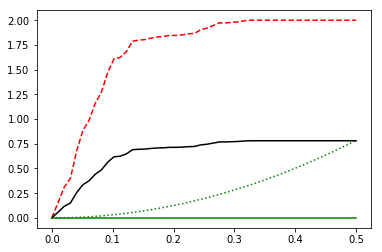

In [65]:
#now to plot and have a look
r = np.linspace(0, 0.5, 50)
plt.plot(r, Kest.poisson(r), color='green', ls=':', label=r'$K_{pois}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='none'), color='red', ls='--',
         label=r'$K_{un}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='translation'), color='black',
         label=r'$K_{trans}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='ohser'), color='blue', ls='-.',
         label=r'$K_{ohser}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='var-width'), color='green',
         label=r'$K_{var-width}$')
plt.plot(r, Kest(data=locsAsArray, radii=r, mode='ripley'), color='yellow',
         label=r'$K_{ripley}$')

In [74]:
#try out a dbscan of all reggae
#create new dbscan cluster object
dbscan = DBSCAN(eps=0.02, min_samples=3)

In [75]:
#get only locations from the reggae set
#get just locations
#use the locsArray again

dbscan1stRun = dbscan.fit(locsAsArray)

In [76]:
#get the labels of the groups
dbscan_labels = dbscan.labels_

In [77]:
dbscan_labels

array([ 0, -1,  1,  2,  0, -1,  0,  1,  0,  1,  2,  0,  0, -1,  0,  0, -1,
       -1,  2,  1,  1,  0,  1, -1,  2,  1, -1, -1], dtype=int64)

In [78]:
#now add the labels back into the reggae dataframe
#need to reindex allReggaeEvents for it to work
allReggaeEventsNewInd = allReggaeEvents.reset_index()

In [79]:
allReggaeEventsNewInd['dbscanLabels1'] = pd.DataFrame(dbscan_labels)

In [80]:
allReggaeEventsNewInd

,index,_id,artists,date,datetime,datetime_source,foursquare,id,lastfm,location,...,popularity,spotify,time,type,url,venue,date_name,lat,lng,dbscanLabels1
0,14,5af9c7040cc9ab0004e227f2,[{'mbid': ['e3c24e1c-1e43-403b-8407-90c8c41070...,2018-05-14,2018-05-14 18:30:00,2018-05-14T19:30:00+0100,"{'id': '4b75c0dcf964a52020222ee3', 'name': 'Th...",33042619,"{'listeners': [162766, 9376, 15377], 'listener...","{'lng': -0.1387684, 'lat': 51.5575896}",...,0.0089,"{'genres': ['canadian hip hop', 'pop', 'rap', ...",19:30:00,Concert,http://www.songkick.com/concerts/33042619-now-...,"{'id': 29349, 'name': 'The Dome, Tufnell Park'...",Monday,51.5576,-0.1388,0
1,82,5af9c7ca0cc9ab0004e22896,[{'mbid': ['51f447ee-e5ba-4cc1-b27c-42ea5a6103...,2018-05-15,2018-05-15 18:30:00,2018-05-15T19:30:00+0100,"{'id': '4b5e0cfdf964a520037b29e3', 'name': 'Bu...",33450909,"{'listeners': [39247, 36646], 'listeners_sum':...","{'lng': -0.2314873, 'lat': 51.5062847}",...,0.0279,"{'genres': ['pop', 'post-teen pop', 'teen pop'...",19:30:00,Concert,http://www.songkick.com/concerts/33450909-jack...,"{'id': 17541, 'name': 'Bush Hall', 'location':...",Tuesday,51.5063,-0.2315,-1
2,270,5afabb18dcab560004a0b08f,[{'mbid': ['83bde443-318c-4d4e-8f31-1ca159df14...,2018-05-18,2018-05-18 17:30:00,2018-05-18T18:30:00+0100,"{'id': '53713174498e54bcdede7275', 'name': 'Up...",32751419,"{'listeners': [3113], 'listeners_sum': 3113, '...","{'lng': -0.1038429, 'lat': 51.5466983}",...,0.0007,"{'genres': [], 'popularity': [37], 'popularity...",18:30:00,Concert,http://www.songkick.com/concerts/32751419-unde...,"{'id': 434301, 'name': 'Thousand Island (forme...",Friday,51.5467,-0.1038,1
3,428,5afabd8ddcab560004a0b271,"[{'mbid': [], 'id': 20602, 'name': 'Fabio And ...",2018-05-19,2018-05-19 01:30:00,2018-05-19T02:30:00+0100,"{'id': '4c308a57ed37a5935bfb6803', 'name': 'Da...",33760344,"{'listeners': [3021, 23922, 46, 13227, 387, 10...","{'lng': -0.0747739, 'lat': 51.5469092}",...,0.0035,"{'genres': ['breakbeat', 'drum and bass', 'jun...",02:30:00,Concert,http://www.songkick.com/concerts/33760344-fabi...,"{'id': 1322316, 'name': 'Dalston Roof Park', '...",Saturday,51.5469,-0.0748,2
4,456,5afabddbdcab560004a0b2b0,[{'mbid': ['a8b0dac5-9f4b-4b28-99fc-7e04980cc7...,2018-05-20,2018-05-20 18:00:00,2018-05-20T19:00:00+0100,"{'id': '4ac518c7f964a52072a520e3', 'name': 'Ja...",32754269,"{'listeners': [4234], 'listeners_sum': 4234, '...","{'lng': -0.1430815, 'lat': 51.5387092}",...,0.0009,"{'genres': ['deep turkish rock', 'turkish hip ...",19:00:00,Concert,http://www.songkick.com/concerts/32754269-ezhe...,"{'id': 7404, 'name': 'The Jazz Cafe', 'locatio...",Sunday,51.5387,-0.1431,0
5,472,5afabe06dcab560004a0b2d5,[{'mbid': ['d121b55b-bb5d-4e9c-89d3-3045d75c73...,2018-05-20,2018-05-20 13:00:00,2018-05-20T14:00:00+0100,"{'id': '4ac518c6f964a52019a520e3', 'name': 'Ja...",33546774,"{'listeners': [4939, 7819, 73845], 'listeners_...","{'lng': -0.1119528, 'lat': 51.47095}",...,0.0029,"{'genres': ['jungle', 'ragga jungle', 'uk dub'...",14:00:00,Concert,http://www.songkick.com/concerts/33546774-jack...,"{'id': 3372, 'name': 'Brixton Jamm', 'location...",Sunday,51.4710,-0.1120,-1
6,585,5afaec82f4259d0004b0e44f,"[{'mbid': [], 'id': 344650, 'name': 'Jazz Jama...",2018-04-13,2018-04-13 18:00:00,2018-04-13T19:00:00+0100,NaN,31514219,"{'listeners': [13060], 'listeners_sum': 13060,...","{'lng': -0.1430815, 'lat': 51.5387092}",...,0.0004,"{'genres': ['traditional ska'], 'popularity': ...",19:00:00,Concert,http://www.songkick.com/concerts/31514219-jazz...,"{'id': 7404, 'name': 'The Jazz Cafe', 'locatio...",Friday,51.5387,-0.1431,0
7,629,5afaed23f4259d0004b0e4d7,[{'mbid': ['6d87044e-3b4c-4814-819a-5598d55b33...,2018-04-13,2018-04-13 22:00:00,2018-04-13T23:00:00+0100,NaN,32881704,"{'listeners': [112791, 72192, 1529, 7696, 3994...","{'lng': -0.1024779, 'lat': 51.5195531}",...,0.0184,"{'genres': ['post-grunge', 'ninja', 'uk garage...",23:00:00,Concert,http://www.songkick.com/concerts/32881704-redl...,"{'id': 8850, 'name': 'fabric'

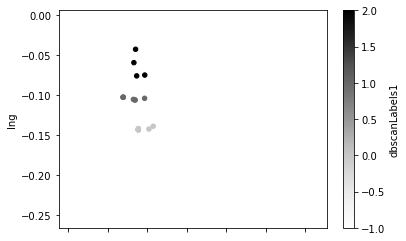

In [81]:
#now give it a plot
#define colorscheme

allReggaeEventsNewInd.plot.scatter(y='lng', x='lat', c='dbscanLabels1', )

In [59]:
#try clustering out on the whole dataset
dbscan2ndRun = dbscan.fit(locsAsArray)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
londonEventsdf